## Importing Libraries and dataset

##### dataset link: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [184]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import copy, math

In [185]:
df = pd.read_csv('diabetes2.csv')
df.shape

(100000, 9)

## Data Preprocessing

In [186]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [187]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [188]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


## Data Visualization

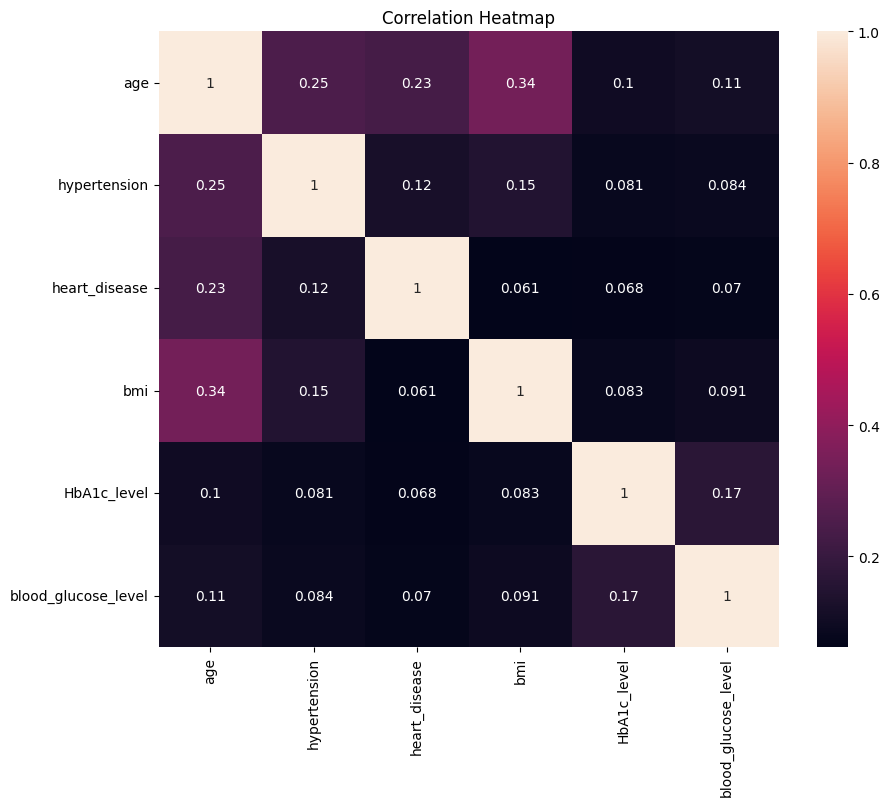

In [204]:
import seaborn as sns

data = df.drop(['gender','smoking_history','diabetes'], axis=1)
# y = df['diabetes']
y1 = df['diabetes']
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()

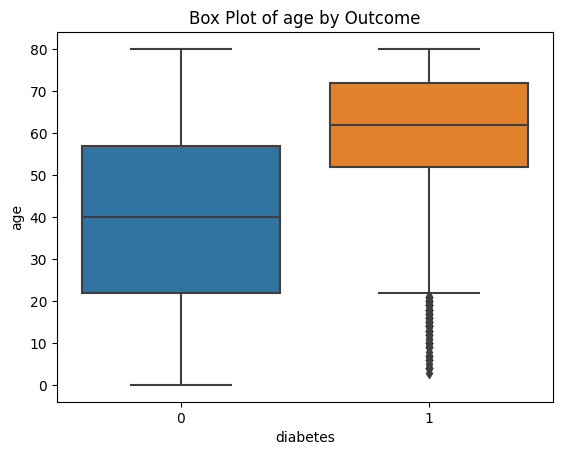

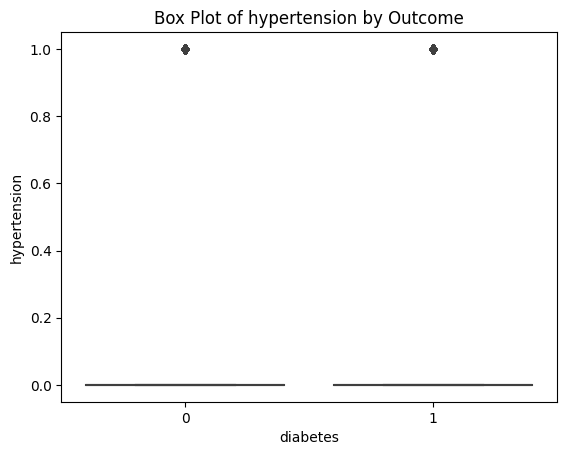

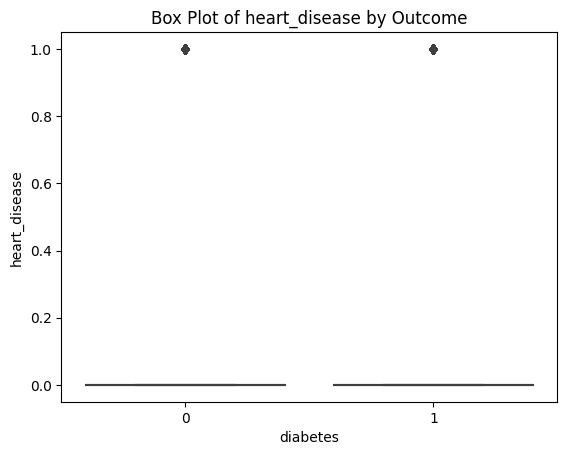

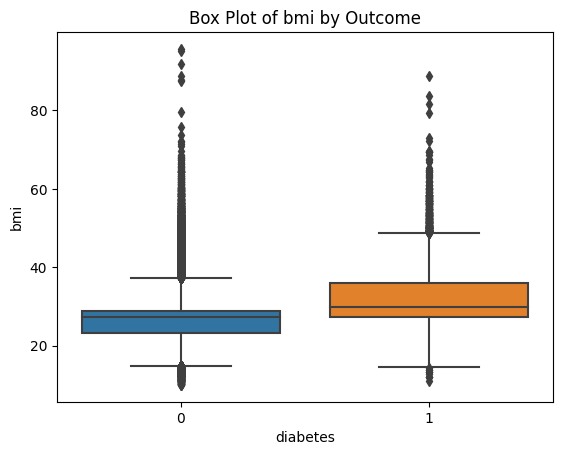

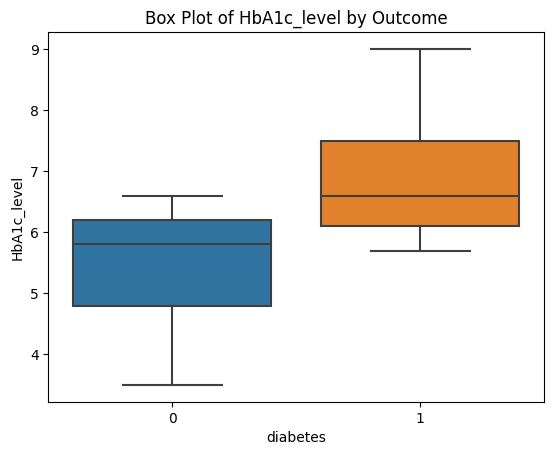

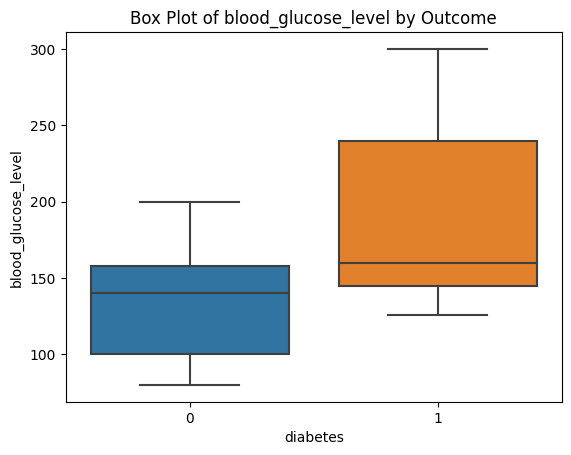

In [208]:
x = df.drop(['gender','hypertension','heart_disease','smoking_history','diabetes'], axis=1)

for column in data.columns:
    sns.boxplot(x="diabetes", y=column, data=df)
    plt.xlabel("diabetes")
    plt.ylabel(column)
    plt.title(f"Box Plot of {column} by Outcome")
    plt.show()


## Logistic Regression Model

In [191]:
x = df.drop(['gender','hypertension','heart_disease','smoking_history','diabetes'], axis=1)
y = df['diabetes']
x.shape


(100000, 4)

In [192]:
import numpy as np
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Convert train and test data to arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

print(f"{X_train.shape}\n{X_test.shape}\n{y_train.shape}\n{y_test.shape}")

(70000, 4)
(30000, 4)
(70000,)
(30000,)


In [193]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [194]:
sigmoid(0)

0.5

In [195]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        z = np.dot(x[i],w) + b
        f = sigmoid(z)
        cost += -y[i] * (np.log(f)) - ((1-y[i]) * np.log(1-f))

    total_cost = cost/m
    return total_cost

In [196]:
def compute_gradient_logistic(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i], w) + b)
        err_i = f_wb_i - y[i]
        dj_db += err_i
        for j in range(n):
            dj_dw[j] += err_i * X[i, j]
    
    dj_dw /= m
    dj_db /= m
        
    return dj_db, dj_dw

In [197]:
import math

# Define the gradient_descent function
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    J_history = []
    w = w_in
    b = b_in
    
    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost = compute_cost(X, y, w, b)  
        
        # Check for NaN values in the cost before appending and printing
        if not np.isnan(cost):
            J_history.append(cost)

        # if i < 100000:  
        #     J_history.append(cost)

        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost:.2f}")
        
    return w, b, J_history

In [198]:
w_init = np.zeros_like(X_train[0])
b_init = 0.
alpha = 0.00001
iters = 200

# Call the gradient_descent function
w_out, b_out, J_hist = gradient_descent(X_train, y_train, w_init, b_init, alpha, iters) 

print(f"\nUpdated parameters: w:{w_out}, b:{b_out}")



Iteration    0: Cost 0.66
Iteration   20: Cost 0.43
Iteration   40: Cost 0.39
Iteration   60: Cost 0.38
Iteration   80: Cost 0.38
Iteration  100: Cost 0.38
Iteration  120: Cost 0.38
Iteration  140: Cost 0.38
Iteration  160: Cost 0.38
Iteration  180: Cost 0.38

Updated parameters: w:[-0.00390492 -0.00418796 -0.00077181 -0.01208061], b:-0.00018614501091301152


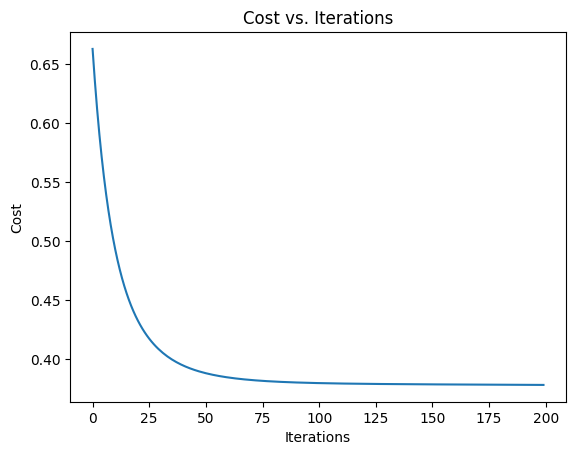

In [199]:
# J_hist contains the cost for each iteration, and iters is the number of iterations
# Plot the cost vs. iterations

plt.plot(range(iters), J_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()


In [200]:
def predict(x):
    z = np.dot(x, w_out) + b_out
    probabilities = sigmoid(z)
    predictions = (probabilities >= 0.5).astype(int)
    return predictions


## Model Evaluation

In [201]:
def accuracy(predictions, actual):
    correct = np.sum(predictions == actual)
    actual = len(predictions)
    accuracy = correct /actual
    return accuracy 


accuracy(predict(X_train), y_train)
print(f"Training accuracy of model: {accuracy(predict(X_train), y_train)}")
print(f"Training accuracy of model: {accuracy(predict(X_test), y_test)}")

Training accuracy of model: 0.9149571428571428
Training accuracy of model: 0.9151


## Using Sklearn library

In [202]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x,y)


from sklearn.metrics import accuracy_score

pred = model.predict(x)
accuracy = accuracy_score(pred, y)

# Print the accuracy
print(f"Accuracy of train dataset: {accuracy:.2f}")

Accuracy of train dataset: 0.96
